### I am working on it, will complete and find best result soon, currently describe path how i am going to perform.

In [51]:
import pandas as pnd
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import operator 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder()


In [52]:
data=pnd.read_csv('uber vs lyft.csv')
pnd.set_option('max_columns', None)
data=data.iloc[:,1:]

In [53]:
uber_data=data[data['cab_type']=='Uber']
uber_data=uber_data.reset_index()
uber_data=uber_data.iloc[:,1:]
uber_data.head()

,id,timestamp,hour,day,month,datetime,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,temperature,short_summary,long_summary,icon,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,latitude,longitude,days name,time of drive
0,a7b50600-c6c5-4e6c-bea9-4487344196d4,1.543204e+09,3,26,11,2018-11-26 03:40:46,North Station,Haymarket Square,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,7.0000,0.56,1.0,41.83,Foggy,Rain in the morning and afternoon.,fog,1.685,46.15,40.15,43.17,39.21,42.3429,-71.1003,Monday,Night
1,9962f244-8fce-4ae9-a583-139d5d7522e1,1.543204e+09,3,26,11,2018-11-26 03:40:46,Theatre District,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,2.2765,1.57,1.0,41.83,Foggy,Rain in the morning and afternoon.,fog,1.685,46.15,40.15,43.17,39.21,42.3429,-71.1003,Monday,Night
2,f67b0a6b-08f9-43bb-b47d-efad7310d4c7,1.543204e+09,3,26,11,2018-11-26 03:40:46,North Station,Fenway,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,10.5000,3.05,1.0,41.83,Foggy,Rain in the morning and afternoon.,fog,1.685,46.15,40.15,43.17,39.21,42.3429,-71.1003,Monday,Night
3,8682f9bf-5cc0-4dfc-b8fe-4e22070d1684,1.543204e+09,3,26,11,2018-11-26 03:40:46,Theatre District,Fenway,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,19.5000,2.71,1.0,41.83,Foggy,Rain in the morning and afternoon.,fog,1.685,46.15,40.15,43.17,39.21,42.3429,-71.1003,Monday,Night
4,6172077a-22de-481b-aae2-b5763c87a6c4,1.543204e+09,3,26,11,2018-11-26 03:40:46,Theatre District,Fenway,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,32.0000,2.71,1.0,41.83,Foggy,Rain in the morning and afternoon.,fog,1.685,46.15,40.15,43.17,39.21,42.3429,-71.1003,Monday,Night


<AxesSubplot:xlabel='price', ylabel='short_summary'>

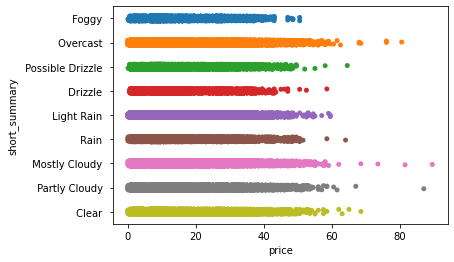

In [54]:
sns.stripplot(data=uber_data, x='price', y='short_summary')

<AxesSubplot:xlabel='price', ylabel='destination'>

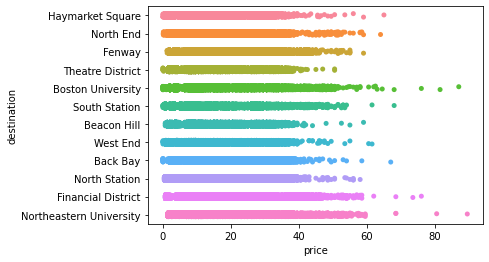

In [55]:
sns.stripplot(data=uber_data, x='price', y='destination')

<AxesSubplot:xlabel='price', ylabel='name'>

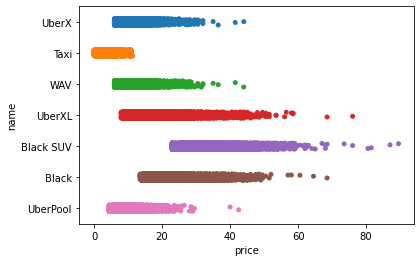

In [56]:
sns.stripplot(data=uber_data, x='price', y='name')

<AxesSubplot:xlabel='price', ylabel='hour'>

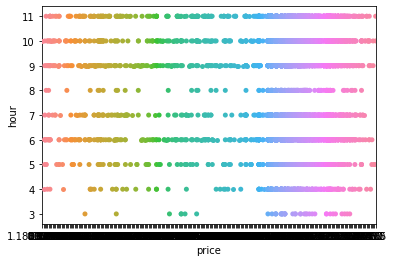

In [57]:
sns.stripplot(data=uber_data[:5000], x='price', y='hour')

<AxesSubplot:xlabel='price', ylabel='source'>

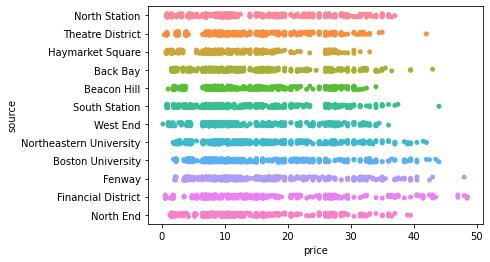

In [58]:
sns.stripplot(data=uber_data[:5000], x='price', y='source')

In [59]:
new_uber=uber_data[['source','destination','name','short_summary','temperature','month','hour','price']]

In [60]:
new_uber['source']=label_encoder.fit_transform(new_uber['source'])
new_uber['destination']=label_encoder.fit_transform(new_uber['destination'])
new_uber['name']=label_encoder.fit_transform(new_uber['name'])
new_uber['short_summary']=label_encoder.fit_transform(new_uber['short_summary'])
new_uber['temperature']=label_encoder.fit_transform(new_uber['temperature'])

<ipython-input-60-3ed6b11a6cd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_uber['source']=label_encoder.fit_transform(new_uber['source'])
<ipython-input-60-3ed6b11a6cd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_uber['destination']=label_encoder.fit_transform(new_uber['destination'])
<ipython-input-60-3ed6b11a6cd9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [61]:
x=new_uber.iloc[:,:-1]
y=new_uber.iloc[:,-1]
x.shape,y.shape

((385663, 7), (385663,))

In [62]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [49]:
poly=PolynomialFeatures(5)
x=poly.fit_transform(X_train)
linear = LinearRegression()
linear.fit(x, y_train)
y_pred1=linear.predict(x)
r2_score(y_train, y_pred1)



0.7768787447513008

In [64]:
x_tes=poly.fit_transform(X_test)
y_pred2=linear.predict(x_tes)
r2_score(y_test, y_pred2)

0.7758266658945432